In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
animal = pd.read_csv('Zoo.csv')
animal.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [66]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


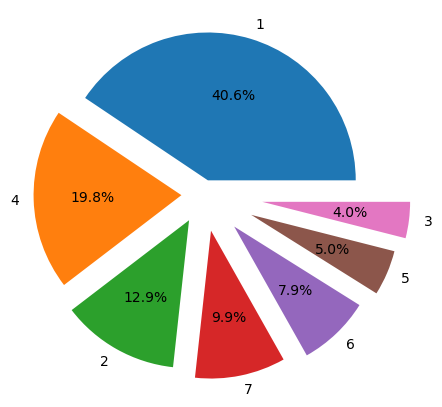

In [4]:
plt.pie(animal.type.value_counts(),labels=list(animal.type.unique()),explode=(0.1,0.15,0.2,0.25,0.3,0.35,0.4),autopct='%1.1f%%')
plt.show()

* clearly it is an imbalance data

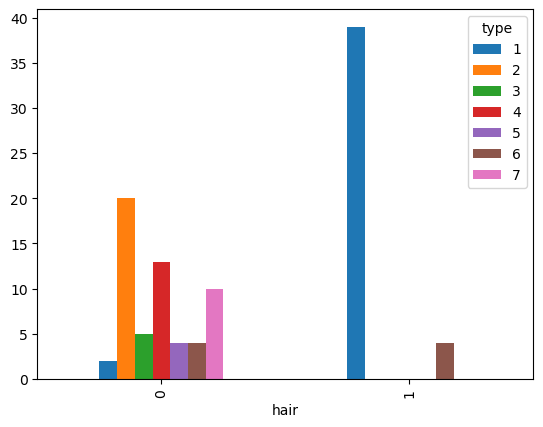

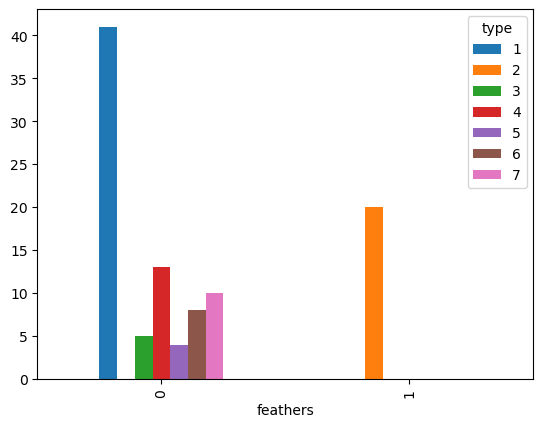

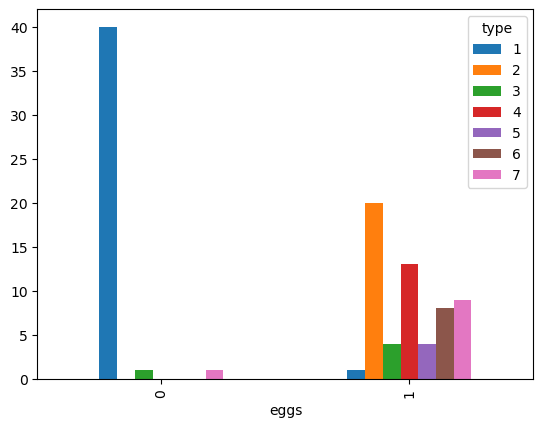

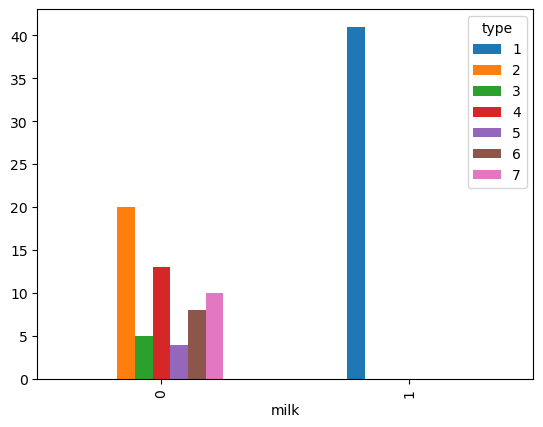

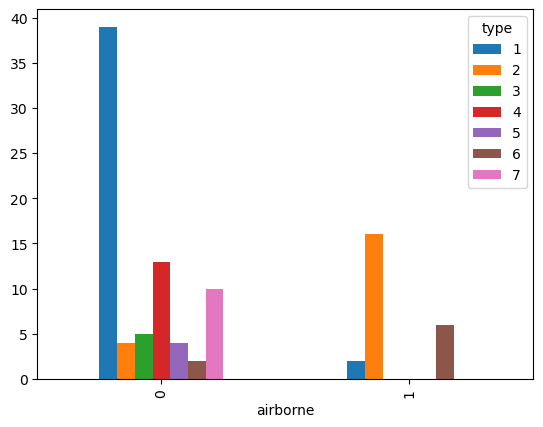

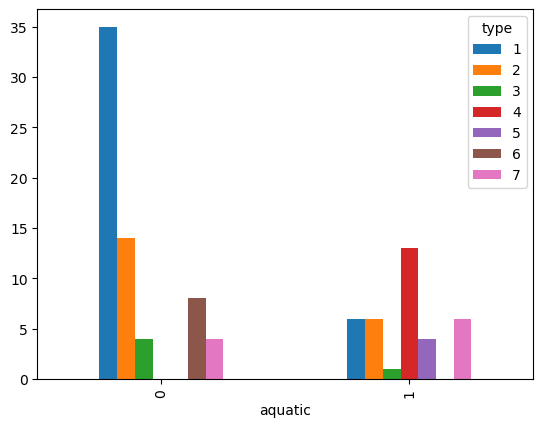

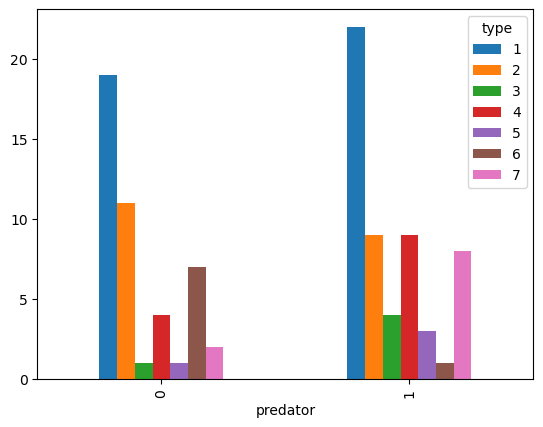

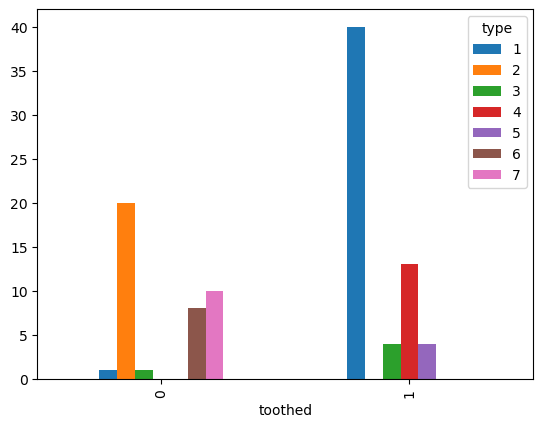

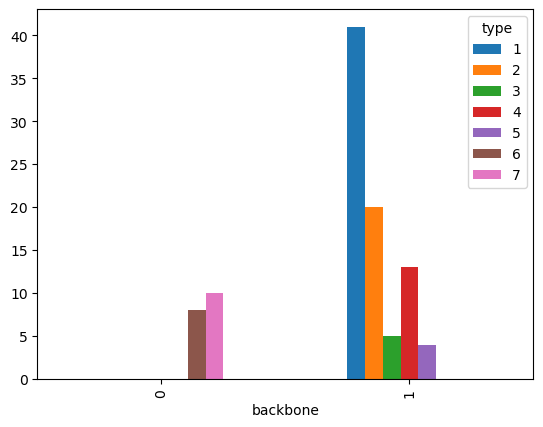

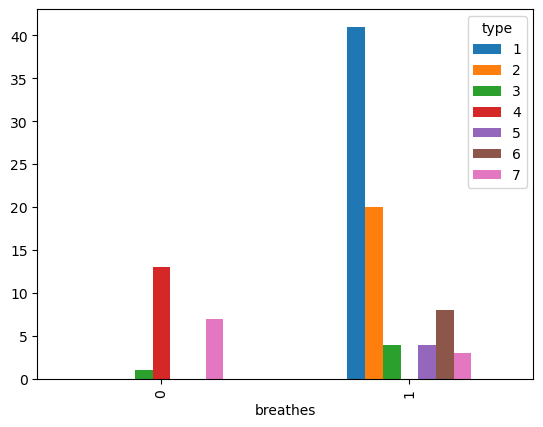

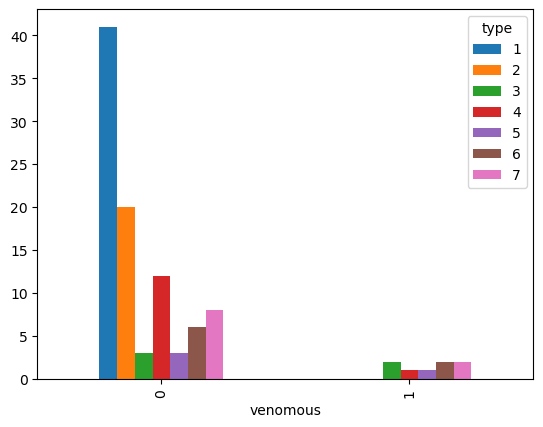

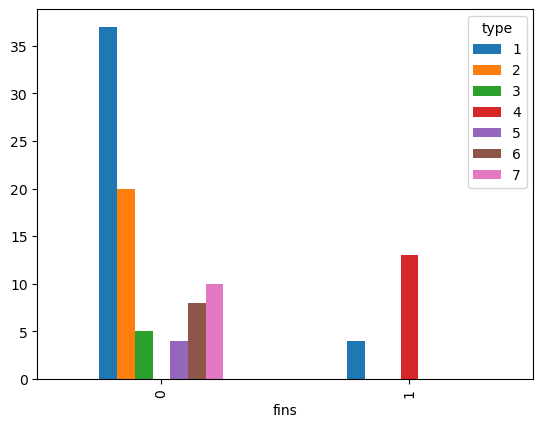

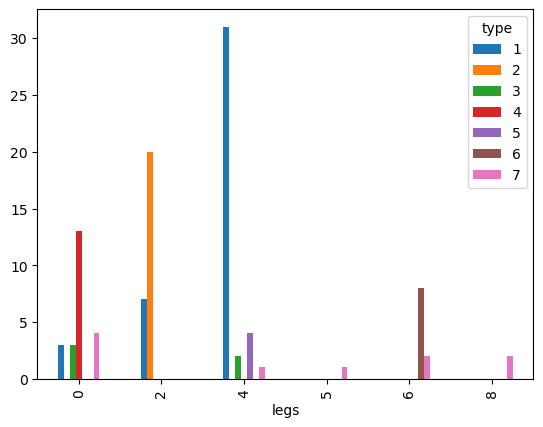

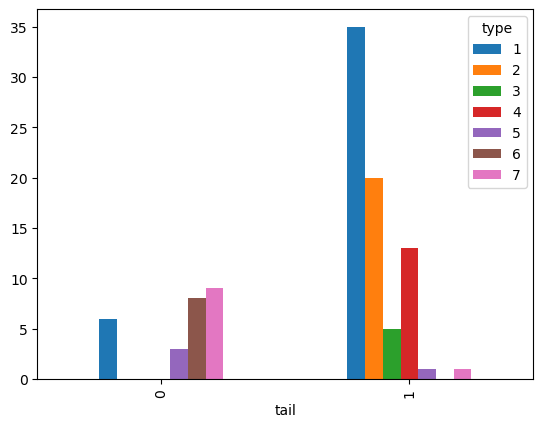

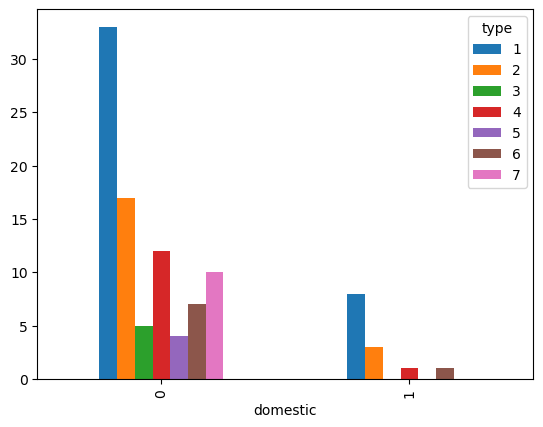

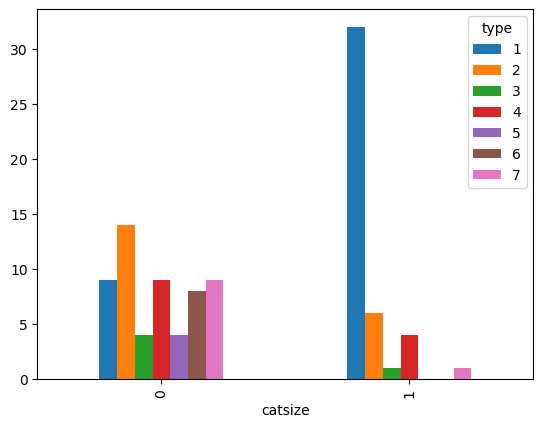

In [39]:
x=animal.iloc[:,1:-1]
for i in x.columns :
    pd.crosstab(animal[i],animal.type).plot(kind="bar")
plt.show()

* All type:1 animals are mammals rest are  oviparous
* Type: 1,2 are non_venomous & rest are vinomous
* Type:1,6 have hair & remaining doesn't
* Type: 4,5 are Aquatic animals & Type:6 are terrestrial animals & remaining survive on both land & water (amphibious)
* Type: 2,6,7 has no tooth they r called edentates.Examples of edentates include:Anteaters,Sloths,Armadillos
* Type: 6,7 has no backbone they are invertebrates
* Only Type: 2 animals have feathers so it is clear that they are Birds
* Type: 4 animals are fishes because they only contains fins
* Type: 3,5,7 are non-domestic animals they may be wild animals,inseccts
* Type:6 animals have no backbone & tail they may be insects,worms etc..
* Type:5,6 are small animals

In [67]:
x=animal.iloc[:,1:-1].values
y=animal.iloc[:,-1].values

In [68]:
x.shape,y.shape

((101, 16), (101,))

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [70]:
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [71]:
model=KNeighborsClassifier()
params={'metric':['euclidean','hamming','minkowski','cosine'],'n_neighbors':np.arange(5,30)}

In [72]:
optimal_params=GridSearchCV(estimator=model,param_grid=params,scoring='f1_micro',cv=4)
optimal_params.fit(X_train,Y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'hamming', 'minkowski',
                                    'cosine'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='f1_micro')

In [73]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'metric': 'hamming', 'n_neighbors': 7}
0.9125000000000001


In [74]:
model=KNeighborsClassifier(n_neighbors=7,metric='hamming')
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=7)

In [75]:
Y_tr_p=model.predict(X_train)
Y_ts_p=model.predict(X_test)

In [76]:
print(classification_report(Y_test,Y_ts_p))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



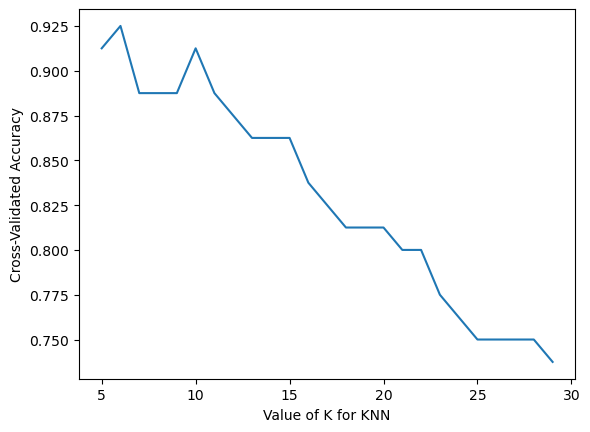

In [77]:
k_range = range(5,30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='hamming')
    scores = cross_val_score(knn,X_train,Y_train,cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Interview Questions:

### What are the key hyperparameters in KNN?

* the key hyperparameters used in KNN are distance metrics(alias metric),n_neighbors
##### n_neighbors
* Purpose: Determines the number of neighbors considered when making predictions.
* Impact: A smaller k can lead to overfitting, while a larger k can lead to underfitting. The optimal value often lies between these extremes.
### What distance metrics can be used in KNN?
* Distance Metric:
* Purpose: Defines how the distance between data points is calculated.
* Common Metrics:
* Euclidean distance: The most common metric, calculating the straight-line distance between points.
* Manhattan distance: Calculates distance as the sum of absolute differences between corresponding coordinates.
* Minkowski distance: A generalization of Euclidean and Manhattan distances.
* Hamming distance: Suitable for categorical data, measures the number of differing features.